Cargamos los datos

In [25]:
grid = get(load("../1.Upscaling/upscaling_ba/ba_grid_5.Rdata"))
grid_fba = get(load("../1.Upscaling/upscaling_fba/ fba_grid_5.Rdata"))

Cargamos el script con las funciones

In [26]:
source("Funciones_FS.r")

In [11]:
##Hacemos la media de todos los eneros, de todos los febreros,... de todos los meses para cada gridBox:
df.seriesTemporales_conCoords <- func.toDataFrame(grid = grid,func = mean)

df.seriesTemporales <- df.seriesTemporales_conCoords[,3:14]


#####Calculamos la Fire Season usando las series temporales (las medias de cada mes)
df.fireSeason <- data.frame(t(data.frame(t(apply(df.seriesTemporales, 1, func.fireSeason)))))
names(df.fireSeason)[ncol(df.fireSeason)] <- 'FireSeason'
rownames(df.fireSeason) <- NULL

##Calculamos las bimodales y lo incluimos en el data frame de la fire season
df.fireSeason <- func.bimodalidad(df.seriesTemporales_conCoords, df.fireSeason)


##Calculamos la Seasonal Concentration y el Seasonal Timing y los incluimos en el data frame de la fire season
vector_c <- c()
vector_p <- c()
for (i in 1:nrow(df.seriesTemporales)){
    carFS <- func.caracterizacion_fireSeason(unlist(df.seriesTemporales[i,]))
    if (is.na(carFS[1])){
        vector_c <- c(vector_c, 0)
        vector_p <- c(vector_p, 0)
    }else{
        C = carFS$C
        P = carFS$P
        vector_c <- c(vector_c, C)
        vector_p <- c(vector_p, P)  
    }
}

df.fireSeason <- cbind(df.fireSeason,vector_c)
names(df.fireSeason)[ncol(df.fireSeason)] <- 'SeasonalConcentration'
df.fireSeason <- cbind(df.fireSeason,vector_p)
names(df.fireSeason)[ncol(df.fireSeason)] <- 'SeasonalTiming'

#Guardamos el data frame de las fires seasons antes de añadirle las coordeandas
#save(df.fireSeason, file = '../3.Datos generados/datos/dfFireSeason.Rdata')

nrow(df.fireSeason)

[1] 2592

### Fire Season

Si hay incendios durante todo el año no hay fire season

In [5]:
conFireSeason <- nrow(df.fireSeason[!is.na(df.fireSeason$FireSeason), ])
sinFireSeason <- nrow(df.fireSeason[is.na(df.fireSeason$FireSeason), ])


cat('Total de gridBoxes = ',nrow(df.fireSeason),
'\nGridboxes con fire season = ',conFireSeason, '(',conFireSeason/nrow(df.fireSeason)*100,'%)',
'\nGridboxes sin fire season = ',sinFireSeason, '(',sinFireSeason/nrow(df.fireSeason)*100,'%)')

Total de gridBoxes =  64800 
Gridboxes con fire season =  12554 ( 19.37346 %) 
Gridboxes sin fire season =  52246 ( 80.62654 %)

Podemos mostrar, a modo de ejemplo, los gridBoxes que  sí que tienen Fire Season

In [6]:
df.fireSeason[!is.na(df.fireSeason$FireSeason), ][1:10,]

,coord_x,coord_y,FireSeason,Bimodal,SeasonalConcentration,SeasonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
336,-178.5,65.5,9,FALSE,1.0000000,0.5235988
338,-178.5,67.5,6,FALSE,0.9991005,-1.5674149
517,-177.5,66.5,7,FALSE,1.0000000,-1.5707963
696,-176.5,65.5,8,FALSE,1.0000000,1.0471976
697,-176.5,66.5,7,FALSE,0.9699360,1.2180319
876,-175.5,65.5,7,FALSE,0.9805634,1.4819996
1056,-174.5,65.5,6,FALSE,1.0000000,-1.0471976
1235,-173.5,64.5,6,FALSE,1.0000000,-1.0471976
1236,-173.5,65.5,7,FALSE,0.9834513,1.1199276


#### Bimodales

In [7]:
cant_unimodales = nrow(df.fireSeason[df.fireSeason$'Bimodal' == FALSE, ])
cant_bimodales = nrow(df.fireSeason[df.fireSeason$'Bimodal' == TRUE, ])

cat('Cantidad de Unimodales = ',cant_unimodales , '(',cant_unimodales/nrow(df.fireSeason)*100,'%)',
    '\nCantidad de Bimodales',cant_bimodales , '(',cant_bimodales/nrow(df.fireSeason)*100,'%)')

Cantidad de Unimodales =  61255 ( 94.52932 %) 
Cantidad de Bimodales 3545 ( 5.470679 %)

In [8]:
df.fireSeason[df.fireSeason$'Bimodal' == TRUE, ][1:5,]

,coord_x,coord_y,FireSeason,Bimodal,SeasonalConcentration,SeasonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
4072,-157.5,21.5,"1, 3, 4, 5, 6, 7, 8",TRUE,0.4211922,-1.2521926
4252,-156.5,21.5,"3, 4, 8",TRUE,0.6397004,0.8323537
7532,-138.5,61.5,"4, 6",TRUE,0.9825494,1.5664476
8795,-131.5,64.5,"5, 6, 8",TRUE,0.9123377,0.9760211
9326,-128.5,55.5,"4, 5, 7, 8",TRUE,0.4692282,1.4486617


Ejemplo de Bimodal

1           2           3           4           5           6 
  20.734073    1.219645   87.282741 2723.270145 5318.280643  459.506724 
          7           8           9          10          11          12 
 554.913238 2762.182214 4560.069181 1077.381986  164.316086    3.577643

png 
  2

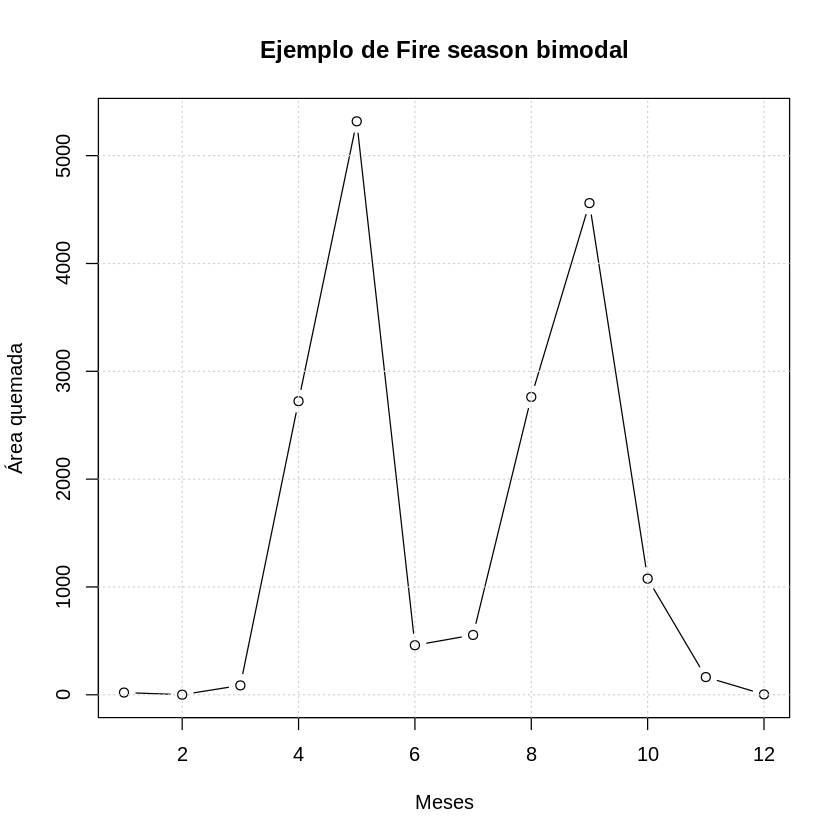

In [22]:
pixel = 11
##escogemos la x de una bimodal
x  <- df.fireSeason[df.fireSeason$'Bimodal' == TRUE, ][pixel,]$'coord_x'
##escogemos la y de la misma bimodal
y  <- df.fireSeason[df.fireSeason$'Bimodal' == TRUE, ][pixel,]$'coord_y'
ejemplo_bimodal <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_bimodal <- unlist((ejemplo_bimodal[,3:14]))
ejemplo_bimodal
plot(ejemplo_bimodal,type ='b', main= 'Ejemplo de Fire season bimodal',ylab = 'Área quemada', xlab = 'Meses')
grid()
png("ejemploBimodal.png")
plot(ejemplo_bimodal,type ='b', main= 'Ejemplo de Fire season bimodal',ylab = 'Área quemada', xlab = 'Meses')
grid()
dev.off()

### Caracterización global de la fire season

#### Seasonal concentration

In [11]:
non_seasonalConcentration <- df.fireSeason[df.fireSeason$'SeasonalConcentration' == 0, ]
SeasonalConcentration_low <- df.fireSeason[df.fireSeason$'SeasonalConcentration' <0.5 & df.fireSeason$'SeasonalConcentration' >0, ]
SeasonalConcentration_high <- df.fireSeason[df.fireSeason$'SeasonalConcentration' >0.5, ]

cat('Cantidad de series sin concentración estacionaria (igual a 0) = ', nrow(non_seasonalConcentration), '(',nrow(non_seasonalConcentration)/nrow(df.fireSeason)*100,'%)',
'\nCantidad de series con concentración estacionaria baja (menor que 0) = ',nrow(SeasonalConcentration_low) , '(',nrow(SeasonalConcentration_low)/nrow(df.fireSeason)*100,'%)',
    '\nCantidad de series con concentración estacionaria alta (mayor que 0) = ',nrow(SeasonalConcentration_high) , '(',nrow(SeasonalConcentration_high)/nrow(df.fireSeason)*100,'%)')

Cantidad de series sin concentración estacionaria (igual a 0) =  52246 ( 80.62654 %) 
Cantidad de series con concentración estacionaria baja (menor que 0) =  1306 ( 2.015432 %) 
Cantidad de series con concentración estacionaria alta (mayor que 0) =  11248 ( 17.35802 %)

Ejemplo de Seasonal concentration high

In [12]:
##escogemos la x de una bimodal
x  <- SeasonalConcentration_high$'coord_x'[1]
##escogemos la y de la misma bimodal
y  <- SeasonalConcentration_high$'coord_y'[1]

X1       X2       X3       X4       X5       X6       X7       X8 
0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
      X9      X10      X11      X12 
5.110919 0.000000 0.000000 0.000000

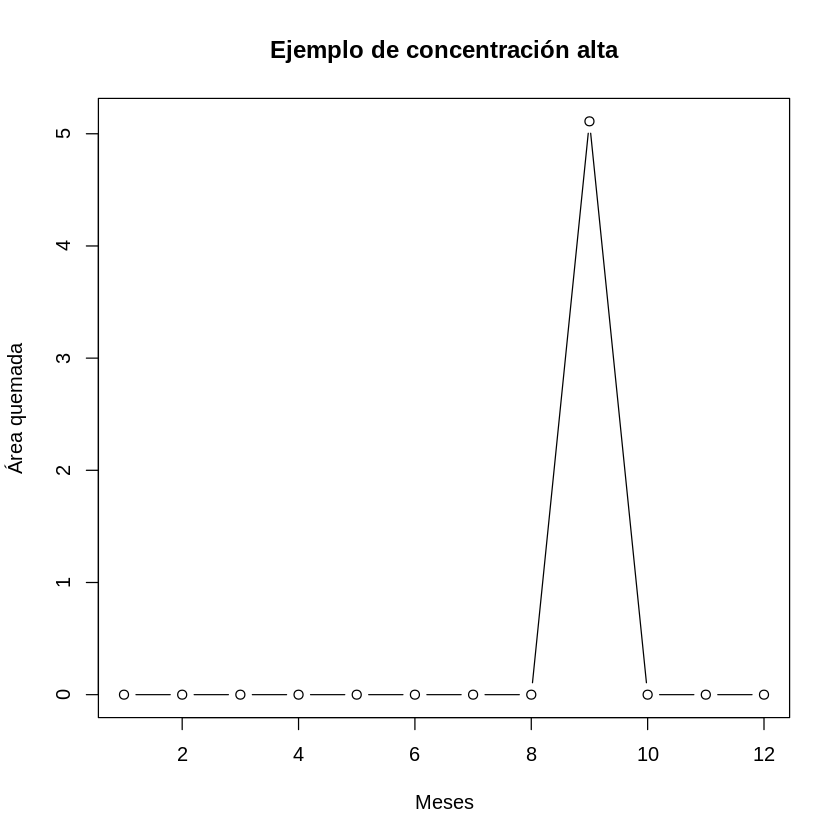

In [13]:
ejemplo_SCH <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_SCH <- unlist((ejemplo_SCH[,3:14]))
ejemplo_SCH
plot(ejemplo_SCH,type ='b', main= 'Ejemplo de concentración alta',ylab = 'Área quemada', xlab = 'Meses')


Ejemplo de Seasona concentration Low

In [14]:
##escogemos la x de una concentration low
x  <- SeasonalConcentration_low$'coord_x'[1]
##escogemos la y de la misma serie
y  <- SeasonalConcentration_low$'coord_y'[1]

,coord_x,coord_y,FireSeason,Bimodal,SeasonalConcentration,SeasonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
4072,-157.5,21.5,"1, 3, 4, 5, 6, 7, 8",TRUE,0.4211922,-1.252193


X1        X2        X3        X4        X5        X6        X7        X8 
 4.146814  0.000000 28.295914 70.983718  1.788819  9.710748 55.197938 39.354081 
       X9       X10       X11       X12 
50.342562  3.833190  0.000000  0.000000

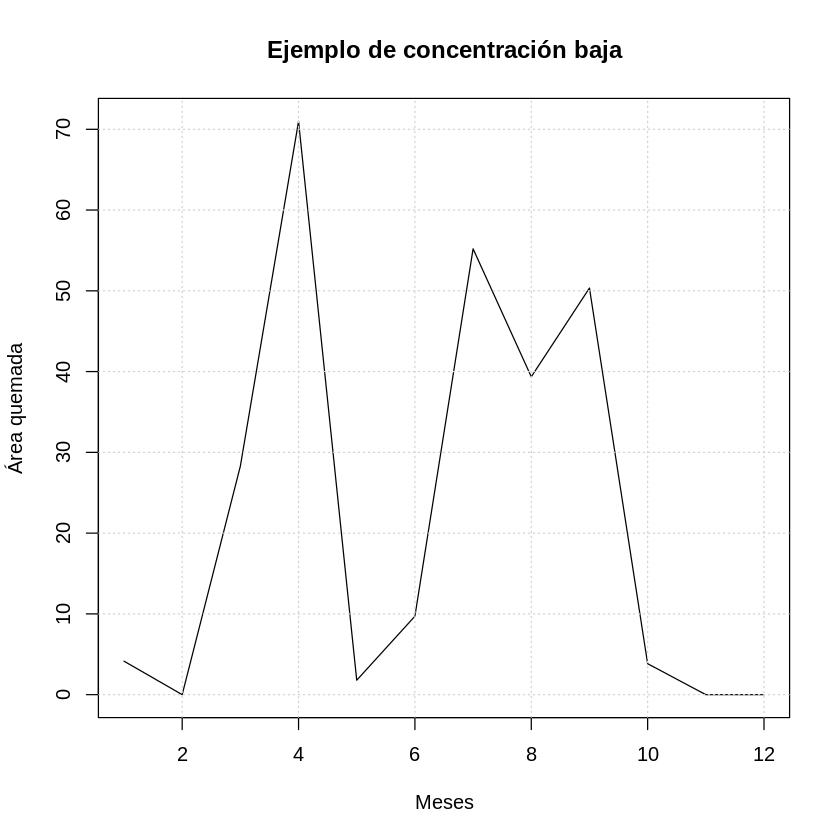

In [15]:
## Como hay muchas series con baja concentración que las coge como una serie de ceros, filtro antes:
#df.fireSeason[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_SCL <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_SCL <- unlist((ejemplo_SCL[,3:14]))
df.fireSeason[df.fireSeason$'coord_x' == x & df.fireSeason$'coord_y' == y, ]
ejemplo_SCL
plot(ejemplo_SCL,type ='l', main= 'Ejemplo de concentración baja',ylab = 'Área quemada', xlab = 'Meses')
grid()

#### Seasonal Timming

In [16]:
st_1 <- df.fireSeason[df.fireSeason$'SeasonalTiming' > -1 & df.fireSeason$'SeasonalTiming' < 0, ]
st_2 <- df.fireSeason[df.fireSeason$'SeasonalTiming' == 0, ]
st_3 <- df.fireSeason[df.fireSeason$'SeasonalTiming' < 1 & df.fireSeason$'SeasonalTiming' > 0, ]


cat('Cantidad de series con seasonal timing mayor que -1 y menor que 0= ', nrow(st_1), '(',nrow(st_1)/nrow(df.fireSeason)*100,'%)',
'\nCantidad de series con seasonal timing igual a 0 = ',nrow(st_2) , '(',nrow(st_2)/nrow(df.fireSeason)*100,'%)',
    '\nCantidad de series con seasonal timing menor que 1 y mayor que 0 = ',nrow(st_3) , '(',nrow(st_3)/nrow(df.fireSeason)*100,'%)')

Cantidad de series con seasonal timing mayor que -1 y menor que 0=  2642 ( 4.07716 %) 
Cantidad de series con seasonal timing igual a 0 =  52246 ( 80.62654 %) 
Cantidad de series con seasonal timing menor que 1 y mayor que 0 =  3890 ( 6.003086 %)

,coord_x,coord_y,FireSeason,Bimodal,SeasonalConcentration,SeasonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
5919,-147.5,68.5,5,FALSE,0.9793771,-0.9513266


X1       X2       X3       X4       X5       X6       X7       X8 
0.000000 0.000000 0.000000 0.000000 1.533276 6.644190 0.000000 0.000000 
      X9      X10      X11      X12 
0.000000 0.000000 0.000000 0.000000

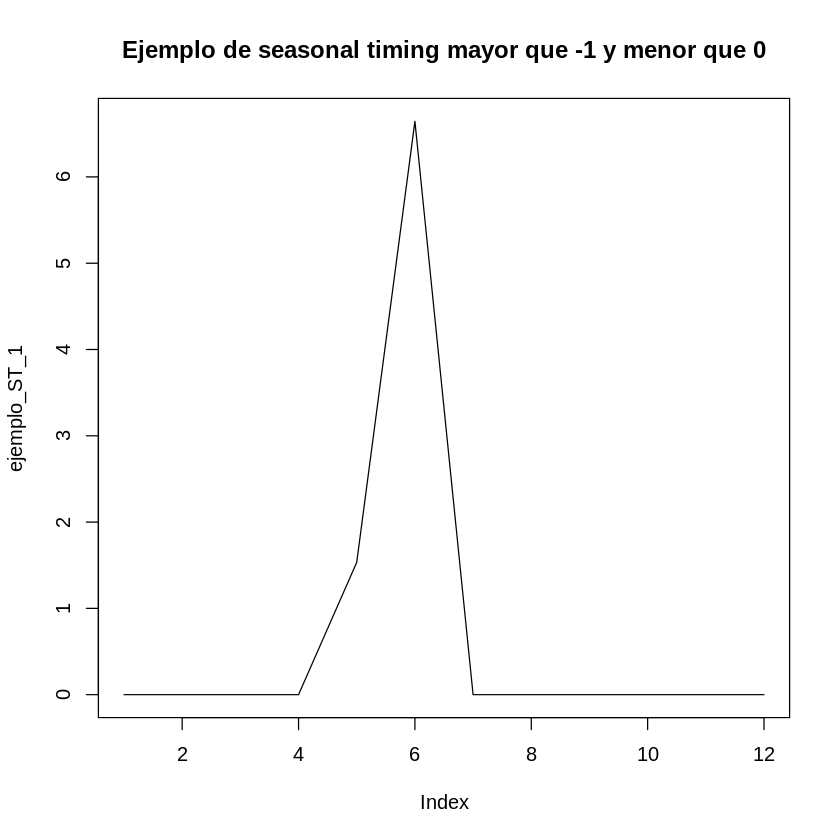

In [20]:
##escogemos la x 
x  <- st_1$'coord_x'[18]
##escogemos la y 
y  <- st_1$'coord_y'[18]
ejemplo_ST_1 <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_ST_1 <- unlist((ejemplo_ST_1[,3:14]))
df.fireSeason[df.fireSeason$'coord_x' == x & df.fireSeason$'coord_y' == y, ]
ejemplo_ST_1
plot(ejemplo_ST_1,type ='l', main= 'Ejemplo de seasonal timing mayor que -1 y menor que 0')

,coord_x,coord_y,FireSeason,Bimodal,SeasonalConcentration,SeasonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
8968,-130.5,57.5,"6, 7, 8",FALSE,0.9321228,0.8086121


X1        X2        X3        X4        X5        X6        X7        X8 
  0.00000   0.00000   0.00000   0.00000   0.00000  20.44368  77.43044 355.97561 
       X9       X10       X11       X12 
559.13470   0.00000   0.00000   0.00000

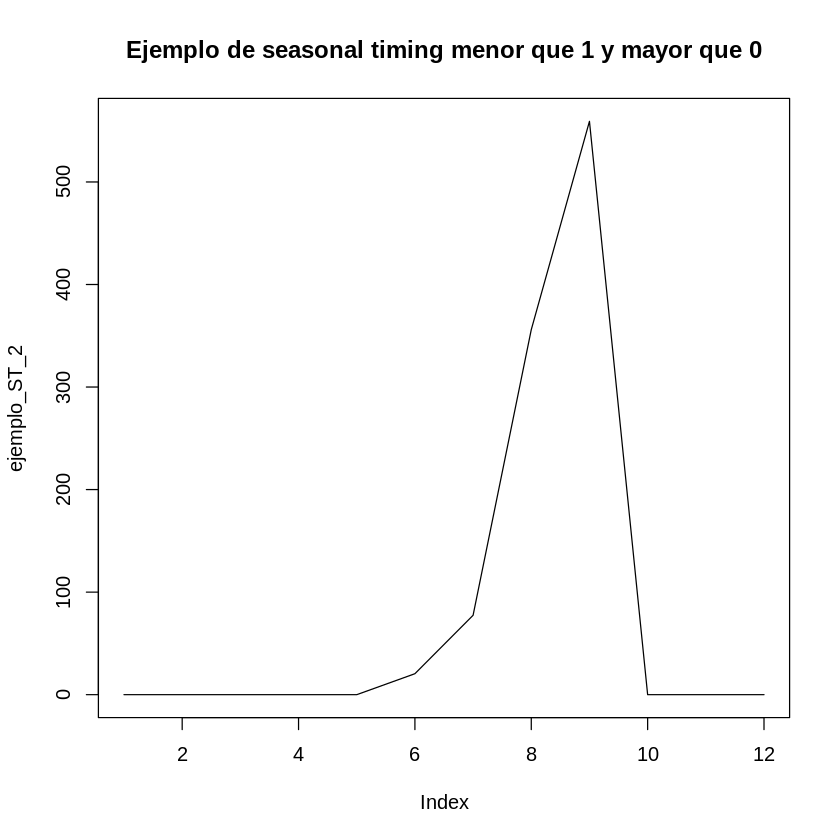

In [21]:
##escogemos la x 
x  <- st_3$'coord_x'[20]
##escogemos la y 
y  <- st_3$'coord_y'[20]
ejemplo_ST_2 <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_ST_2 <- unlist((ejemplo_ST_2[,3:14]))
df.fireSeason[df.fireSeason$'coord_x' == x & df.fireSeason$'coord_y' == y, ]
ejemplo_ST_2
plot(ejemplo_ST_2,type ='l', main= 'Ejemplo de seasonal timing menor que 1 y mayor que 0')

## Visualizaciones

In [39]:
df.fireSeason$SeasonalTiming[is.na(df.fireSeason$FireSeason)] <- NA
df.fireSeason$SeasonalConcentration[is.na(df.fireSeason$FireSeason)] <- NA
df.fireSeason$Bimodal[is.na(df.fireSeason$FireSeason)] <- NA

In [23]:
vector_bimodales <- c()
for (row in 1:nrow(df.fireSeason)){
    if (is.na(df.fireSeason[row,]$FireSeason)){
        vector_bimodales <- c(vector_bimodales, NA)
    }else{
        if (df.fireSeason[row,]$Bimodal == FALSE){
            vector_bimodales <- c(vector_bimodales, 0)
        }else{
            vector_bimodales <- c(vector_bimodales, 1)
        }
    }
}

In [61]:
df_grid = get(load('../3.Datos generados/dataframes/df_grid_15.Rdata'))
ref.grid = get(load('../1.Upscaling/upscaling_fba/ fba_grid_15.Rdata'))

In [62]:
bimodal <- c()
for (row in 1:nrow(df_grid)){
    if (is.na(df_grid$MainStart[row]) & is.na(df_grid$SencondStart[row])){
        bimodal <- c(bimodal, NA)
    }else if (!is.na(df_grid$MainStart[row]) & is.na(df_grid$SencondStart[row]) ){
            bimodal <- c(bimodal, 0)
        }else if (!is.na(df_grid$MainStart[row]) & !is.na(df_grid$SencondStart[row])){
            bimodal <- c(bimodal, 1)
    }
}

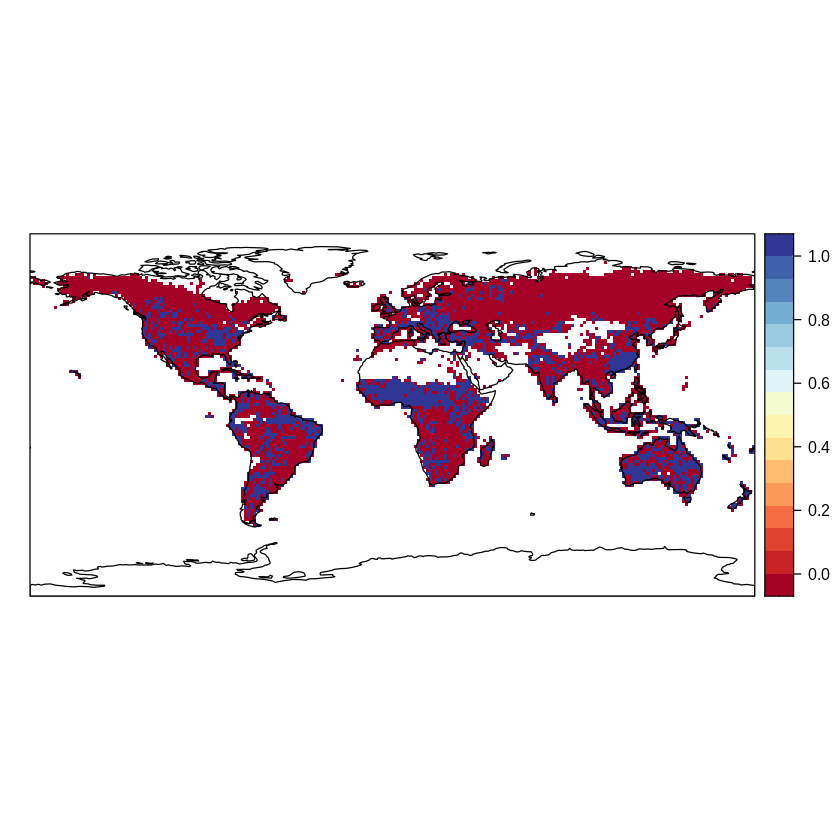

In [64]:
bimodalesOrNot_clim <- quantity2clim(quantity = bimodal, what = 'bimodales', ref.grid = ref.grid, backperm = NULL)
bimodalesOrNot_clim_plot <- spatialPlot(bimodalesOrNot_clim, backdrop.theme = 'coastline')
bimodalesOrNot_clim_plot

In [65]:
plotname <- "nimodales15.pdf"
pdf(plotname)
bimodalesOrNot_clim_plot
dev.off()

png 
  2


0 = Unimodal 
1 = Bimodal

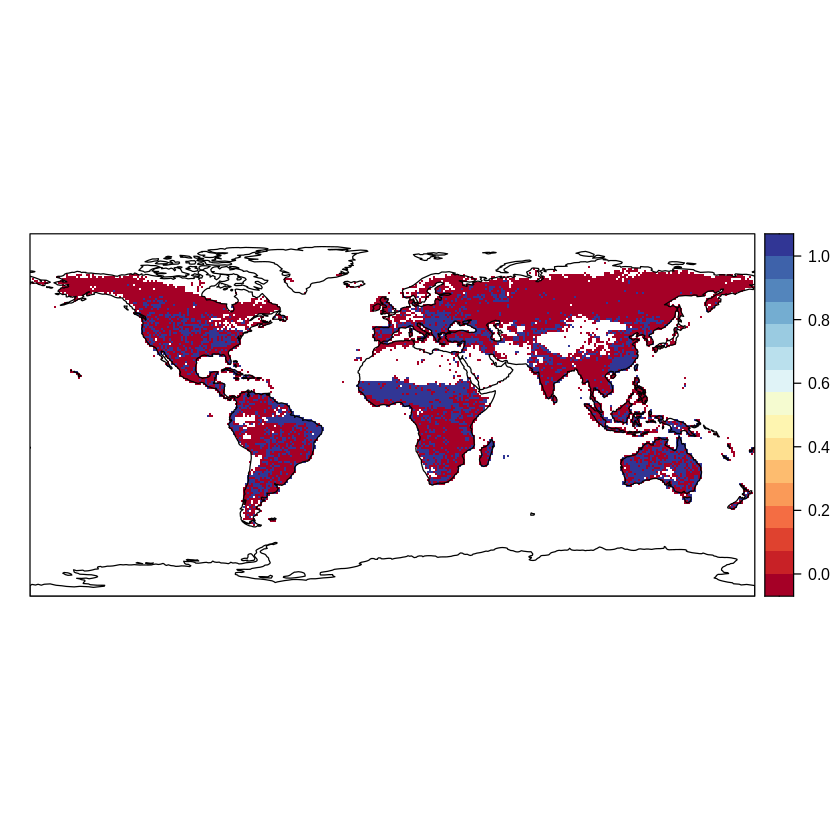

In [24]:
bimodalesOrNot_clim <- quantity2clim(quantity = vector_bimodales, what = 'bimodales', ref.grid = grid, backperm = NULL)
spatialPlot(bimodalesOrNot_clim, backdrop.theme = 'coastline')
cat('\n0 = Unimodal', '\n1 = Bimodal')

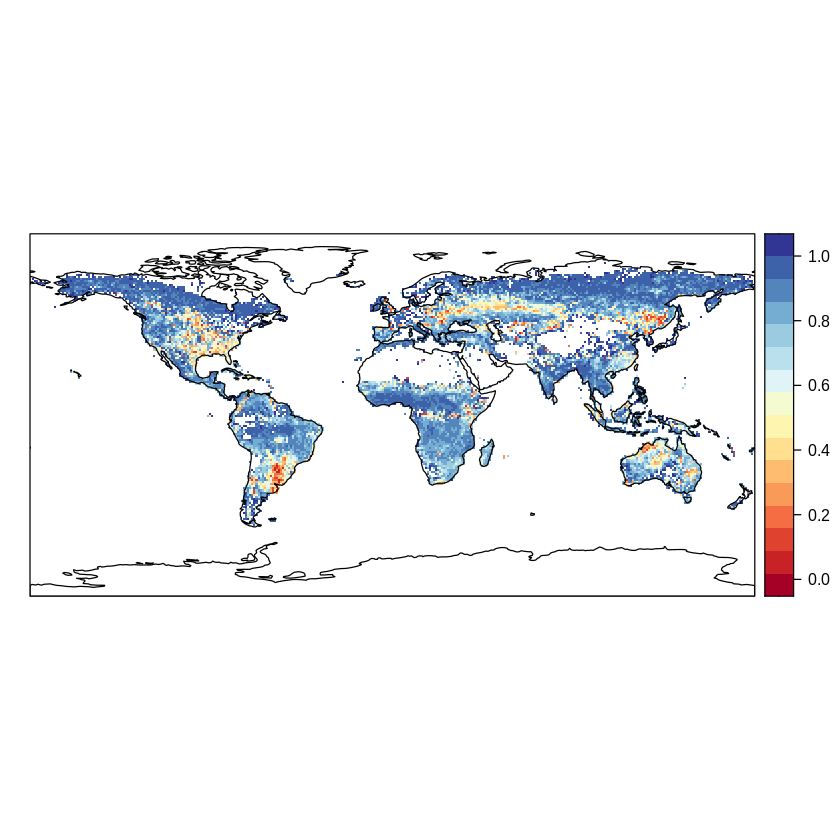

In [28]:
SeasonalConcentration_viz <- quantity2clim(quantity = df.fireSeason$'SeasonalConcentration', what = 'SeasonalConcentration', ref.grid = grid, backperm = NULL)
spatialPlot(SeasonalConcentration_viz, backdrop.theme = 'coastline')

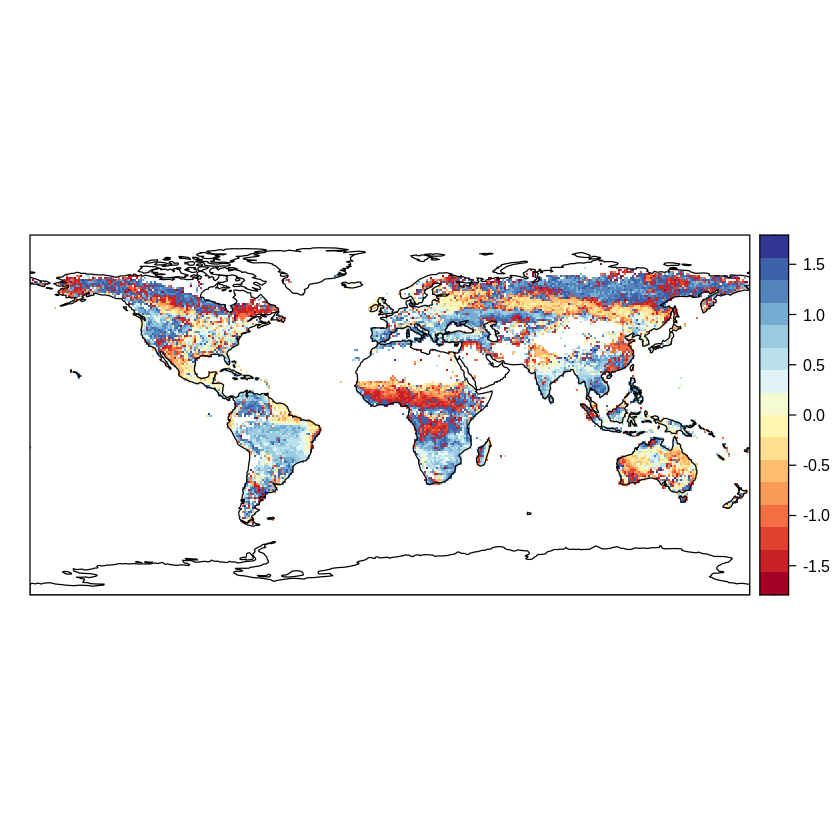

In [29]:
SeasonalTiming_viz <- quantity2clim(quantity = df.fireSeason$'SeasonalTiming', what = 'bimodales', ref.grid = grid, backperm = NULL)
spatialPlot(SeasonalTiming_viz, backdrop.theme = 'coastline')

### Correlaciones

In [46]:
seasonalTiming <- na.omit(df.fireSeason$'SeasonalTiming')
seasonalConcentration <- na.omit(df.fireSeason$'SeasonalConcentration')
bimodal <- na.omit(df.fireSeason$'Bimodal')
matriz_cor = func.matriz_covarianzas(list(bimodal, seasonalConcentration, seasonalTiming), c('Bimodal', 'SeasonalConcentration', 'SeasonalTiming'),cor)

matriz_cor

,Bimodal,SeasonalConcentration,SeasonalTiming
Bimodal,1.0000000,-0.28713406,-0.11832126
SeasonalConcentration,-0.2871341,1.00000000,0.06466876
SeasonalTiming,-0.1183213,0.06466876,1.00000000


### Data frame final

In [96]:
df_fba <- func.ToDataFrame(grid = grid_fba, coordX = grid_fba$xyCoords$x, coordY = grid_fba$xyCoords$y, func = mean)
vector_fba <- df_fba[,1]

100.00% de func.ToDataFrame completado

In [97]:
main_fire_season_start <- c()
main_fire_season_end <- c()
secondary_fire_season_start <- c()
secondary_fire_season_end <- c()
FireSeasonOrNot = c()
fireSeasonLength <- c()
for (i in 1:nrow(df.fireSeason)){
    if (is.na(df.fireSeason[i, ]$'FireSeason')){
        main_fire_season_start <- c(main_fire_season_start, NA)
        secondary_fire_season_start <- c(secondary_fire_season_start, NA)
        main_fire_season_end <- c(main_fire_season_end, NA)
        secondary_fire_season_end <- c(secondary_fire_season_end, NA)
        FireSeasonOrNot = c(FireSeasonOrNot, 0 )
        fireSeasonLength <- c(fireSeasonLength, NA)
    }else{
        main_sec_FS <- func.main_fireSeason(unlist(df.fireSeason[i, ]$'FireSeason'))
        main_fire_season_start <- c(main_fire_season_start, main_sec_FS$main[1])
        secondary_fire_season_start <- c(secondary_fire_season_start, main_sec_FS$secondary[1])
        main_fire_season_end <- c(main_fire_season_end, main_sec_FS$main[length(main_sec_FS$main)])
        secondary_fire_season_end <- c(secondary_fire_season_end, main_sec_FS$secondary[length(main_sec_FS$secondary)])
        FireSeasonOrNot = c(FireSeasonOrNot, 1 )
        fireSeasonLength <- c(fireSeasonLength, length(unlist(df.fireSeason[i, ]$'FireSeason')))
    }
}

In [98]:
df <- data.frame('coord_x' = df.fireSeason$'coord_x', 'coord_y' = df.fireSeason$'coord_y', FireSeasonOrNot, main_fire_season_start,main_fire_season_end, secondary_fire_season_start, secondary_fire_season_end, fireSeasonLength, 'SeasonalConcentration'=df.fireSeason$'SeasonalConcentration', 'SeasonalTiming'=df.fireSeason$'SeasonalTiming','FBA'=vector_fba)
#df$FireSeasonOrNot <- as.integer(df$FireSeasonOrNot)
#save(df, file = '../3.Datos generados/dataframes raster/df_raster')

In [99]:
df[df$'FBA' != 0 & !is.nan(df$'FBA') ,][1:10,]
##SAber distinguir si no hay fire season porque es mar o si no hay fire season porque es tierra ==> Lo podemos filtrar con la fba correspondiente (mascara)
#Incluir como otra variable del data frame el fba

,coord_x,coord_y,FireSeassonOrNot,main_fire_season_start,main_fire_season_end,secondary_fire_season_start,secondary_fire_season_end,fireSeassonLength,SeassonalConcentration,SeassonalTiming,FBA
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
36,-178,52,0,NA,NA,NA,NA,NA,0.0000000,0.0000000,2.035458e-03
39,-178,64,1,8,8,NA,NA,1,0.9939056,0.5475563,7.510775e-02
40,-178,68,1,6,6,NA,NA,1,0.9780148,1.4715809,5.283222e-01
41,-178,72,0,NA,NA,NA,NA,NA,0.0000000,0.0000000,7.072638e-02
81,-174,52,0,NA,NA,NA,NA,NA,0.0000000,0.0000000,1.639105e-03
83,-174,60,0,NA,NA,NA,NA,NA,0.0000000,0.0000000,5.277024e-04
84,-174,64,1,6,7,NA,NA,2,0.9864471,-1.0857997,2.467580e-01
85,-174,68,1,8,8,NA,NA,1,1.0000000,1.0471976,2.694328e-01
86,-174,72,0,NA,NA,NA,NA,NA,0.0000000,0.0000000,6.269093e-06


In [100]:
df_previo <- get(load('../3.Datos generados/dataframes/df_grid_4.Rdata'))

In [29]:
library('raster')

Loading required package: sp



In [30]:
spatial_df <-- df[c("coord_x","coord_y","FireSeasonOrNot")]

In [31]:
dfr  <- rasterFromXYZ(df)

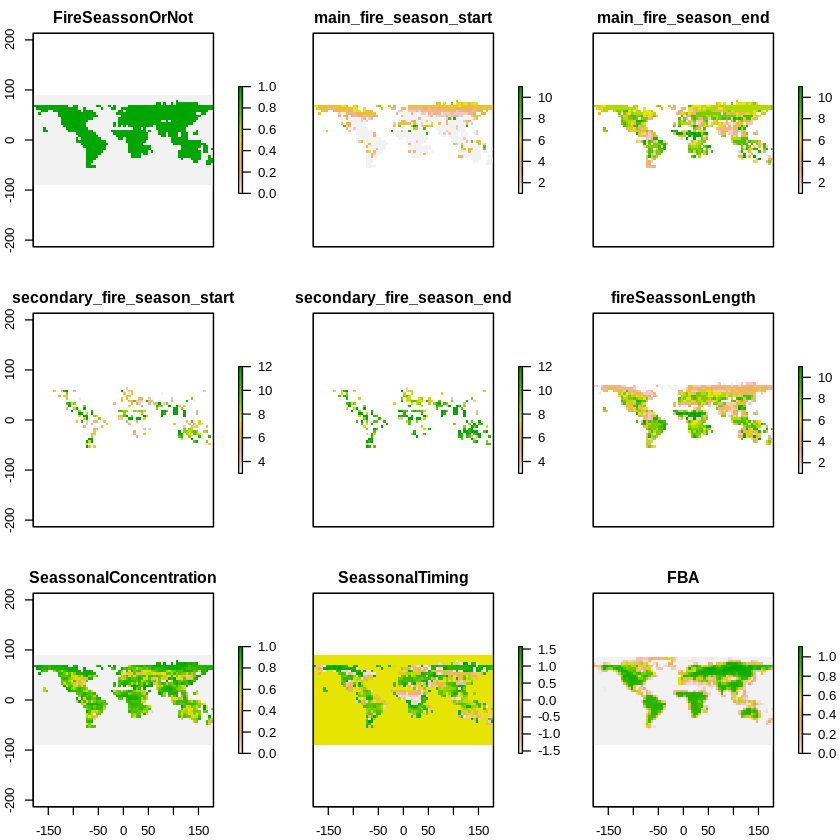

In [33]:
plot(dfr)

In [34]:
nombre_variable <- deparse(substitute(ba.mergeGrid5))
ruta <- '../3.Datos generados/dataframes raster/df_raster_'
ruta_archivo <- paste0(ruta,nombre_variable,'.tif')
writeRaster(dfr, filename = ruta_archivo, format = "GTiff")

Warning message in .gd_SetProject(object, ...):
“NOT UPDATED FOR PROJ >= 6”
